# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [99]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1mCops_3t", "run_measurements.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1mCops_3t\run_measurements.csv


### Insert latencies in ms into the measurement table

In [100]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [101]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [102]:
df.describe()

,sent,received,latency_ms,sent_ms,received_ms
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.451032e+12,3.451040e+12,8.203986e+00,3.451032e+06,3.451040e+06
std,2.676066e+11,2.676071e+11,2.236801e+01,2.676066e+05,2.676071e+05
min,3.009894e+12,3.010038e+12,6.495310e-01,3.009894e+06,3.010038e+06
25%,3.196562e+12,3.196587e+12,1.394271e+00,3.196562e+06,3.196587e+06
50%,3.443921e+12,3.443924e+12,2.071056e+00,3.443921e+06,3.443924e+06
75%,3.684901e+12,3.684904e+12,3.688821e+00,3.684901e+06,3.684904e+06
max,3.937053e+12,3.937055e+12,3.922801e+02,3.937053e+06,3.937055e+06


### Restructure Timeline

In [103]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Create Function to prune Measurements

In [104]:
def pruneMeasurements(dataframe): 
    print("Hello from the other side")
    
pruneMeasurements(df)


Hello from the other side


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [105]:
dfA1 = df.loc[(df["workerId"] == "w1-vA")]
dfA2 = df.loc[(df["workerId"] == "w2-vA")]
dfA3 = df.loc[(df["workerId"] == "w3-vA")]
dfB1 = df.loc[(df["workerId"] == "w1-vB")]
dfB2 = df.loc[(df["workerId"] == "w2-vB")]
dfB3 = df.loc[(df["workerId"] == "w3-vB")]
dfA = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfB = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

### Return benchmark run time (First request send to last response received)

In [106]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000000/1000/60, "minuten")

15.452681873583334 minuten


In [107]:
dfA.describe()

,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,3.451173e+12,3.451181e+12,8.153034,3.451173e+06,3.451181e+06,441.279290
std,2.657365e+11,2.657369e+11,22.277434,2.657365e+05,2.657369e+05,265.736459
min,3.009894e+12,3.010064e+12,0.669454,3.009894e+06,3.010064e+06,0.000000
25%,3.199147e+12,3.199150e+12,1.395673,3.199147e+06,3.199150e+06,189.252956
50%,3.444653e+12,3.444655e+12,2.075693,3.444653e+06,3.444655e+06,434.759591
75%,3.684178e+12,3.684184e+12,3.679725,3.684178e+06,3.684184e+06,674.284831
max,3.927611e+12,3.927612e+12,384.965052,3.927611e+06,3.927612e+06,917.717018


In [108]:
dfB.describe()

,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,3.450891e+12,3.450899e+12,8.254939,3.450891e+06,3.450899e+06,440.997425
std,2.694638e+11,2.694644e+11,22.458113,2.694638e+05,2.694644e+05,269.463824
min,3.009894e+12,3.010038e+12,0.649531,3.009894e+06,3.010038e+06,0.000339
25%,3.193150e+12,3.193158e+12,1.392855,3.193150e+06,3.193158e+06,183.256744
50%,3.443195e+12,3.443203e+12,2.065935,3.443195e+06,3.443203e+06,433.301618
75%,3.685664e+12,3.685666e+12,3.697239,3.685664e+06,3.685666e+06,675.770331
max,3.937053e+12,3.937055e+12,392.280054,3.937053e+06,3.937055e+06,927.158988


### Min. Latencies for Worker 2 (A & B)

In [118]:
dfA3.loc[dfA3["latency_ms"].idxmin()]

workerId                                        w3-vA
queryType                                      SELECT
queryId          353a59a3-217b-4a03-b0ac-81d91066245d
sent                                    3347847894222
received                                3347848616651
target-region                                 unknown
latency_ms                                   0.722429
sent_ms                                3347847.894222
received_ms                            3347848.616651
sent_sec                                   337.954296
Name: 1598929, dtype: object

In [121]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                                        w1-vB
queryType                                      SELECT
queryId          8a43da84-a77b-47d7-afd6-47410b5cdb21
sent                                    3212955576568
received                                3212956279143
target-region                                 unknown
latency_ms                                   0.702575
sent_ms                                3212955.576568
received_ms                            3212956.279143
sent_sec                                   203.061978
Name: 177515, dtype: object

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [111]:

dfA2["sent"].min() - dfB2["sent"].min()

-578214

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [112]:
dfA1["sent"].max() - dfB1["sent"].max() 


-16122698535

## Create Figures 

### Create Boxplots

In [113]:
sns.set_theme(style="darkgrid")

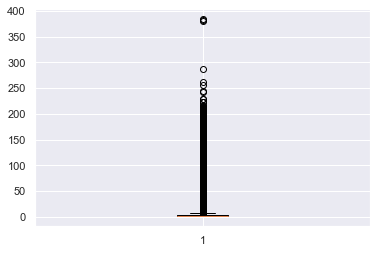

In [114]:
ax = plt.boxplot(x=dfA["latency_ms"])


### Create Flowchart

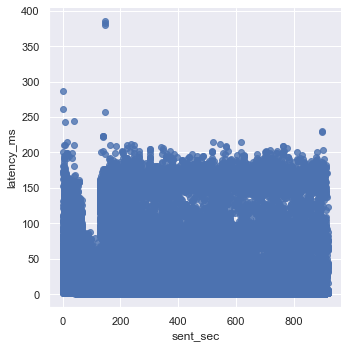

In [115]:
sns.lmplot(x='sent_sec', y='latency_ms', data=dfA, fit_reg=False)